In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

# Reading and Data Preparation

In [2]:
data = pd.read_csv(r"C:\Users\anant\Downloads\DS3_CS2_SP6_Hackathon_House_Data_HackathonBrief.csv")
print(data.shape)
print(data.dtypes)

(1460, 81)
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [3]:
data['AgeWhenSold']=data['YrSold']-data['YearBuilt']
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeWhenSold
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8


In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
req_df=data[['GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']]
req_df

,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
0,1710,1,0,2,1
1,1262,0,1,2,0
2,1786,1,0,2,1
3,1717,1,0,1,0
4,2198,1,0,2,1
...,...,...,...,...,...
1455,1647,0,0,2,1
1456,2073,1,0,2,0
1457,2340,0,0,2,0
1458,1078,1,0,1,0


# Binary Classification

In [6]:
req_df['bath'] = req_df['BsmtFullBath']+req_df['BsmtHalfBath']+req_df['FullBath']+req_df['HalfBath']

In [7]:
req_df.head()

,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,bath
0,1710,1,0,2,1,4
1,1262,0,1,2,0,3
2,1786,1,0,2,1,4
3,1717,1,0,1,0,2
4,2198,1,0,2,1,4


In [8]:
req_df.drop(columns=['BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath'],inplace=True)

In [9]:
req_df['bath'].value_counts()

2    572
3    477
1    228
4    172
5      8
6      3
Name: bath, dtype: int64

In [10]:
req_df.head()

,GrLivArea,bath
0,1710,4
1,1262,3
2,1786,4
3,1717,2
4,2198,4


In [11]:
req_df['bath']=req_df['bath'].apply(lambda x: 1 if (x>1) else 0)

In [12]:
req_df['bath'].value_counts()

1    1232
0     228
Name: bath, dtype: int64

## Splitting the Data

In [13]:
def splitdata(data,y,ratio=0.25):
    trainx,testx,trainy,testy = train_test_split(data.drop(y,1), data[y],test_size=ratio)
    
    return(trainx,trainy,testx,testy)

In [14]:
y='bath'

In [15]:
trainx1,trainy1,testx1,testy1 = splitdata(req_df,y)

In [16]:
print('trainx={},trainy={},testx={},testy={}'.format(trainx1.shape, trainy1.shape, testx1.shape, testy1.shape))

trainx=(1095, 1),trainy=(1095,),testx=(365, 1),testy=(365,)


## Model Building

In [17]:
def compilemodel(units,shape):
    model = tf.keras.Sequential([
        Dense(units,activation='relu',input_shape=[shape]), #HL1
        Dense(units,activation='relu'), #HL2
        Dense(units,activation='relu'), #HL3
        Dense(1,activation='sigmoid') #output layer
    ]) 
    
    #compiling the model
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) 
    
    return(model)

In [18]:
def fitmodel(model,trainx,trainy,epoch,valsplit=0.2): 
    model.fit(trainx,trainy,epochs=epoch,validation_split=valsplit)

In [19]:
units = 10
shape=len(trainx1.columns)
print(units,shape)

10 1


In [20]:
m1=compilemodel(units,shape)

In [21]:
EPOCHS = 250
fitmodel(m1,trainx1,trainy1,EPOCHS)

Epoch 1/250
28/28 [==============================] - 0s 6ms/step - loss: 0.4184 - accuracy: 0.8288 - val_loss: 0.3749 - val_accuracy: 0.8584
Epoch 2/250
28/28 [==============================] - 0s 1ms/step - loss: 0.4296 - accuracy: 0.8288 - val_loss: 0.4223 - val_accuracy: 0.8584
Epoch 3/250
28/28 [==============================] - 0s 1ms/step - loss: 0.4135 - accuracy: 0.8288 - val_loss: 0.3492 - val_accuracy: 0.8584
Epoch 4/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3965 - accuracy: 0.8288 - val_loss: 0.5199 - val_accuracy: 0.8584
Epoch 5/250
28/28 [==============================] - 0s 1ms/step - loss: 0.4283 - accuracy: 0.8288 - val_loss: 0.3567 - val_accuracy: 0.8584
Epoch 6/250
28/28 [==============================] - 0s 1ms/step - loss: 0.4068 - accuracy: 0.8288 - val_loss: 0.3541 - val_accuracy: 0.8584
Epoch 7/250
28/28 [==============================] - 0s 1ms/step - loss: 0.4046 - accuracy: 0.8288 - val_loss: 0.3478 - val_accuracy: 0.8584
Epoch 8/250
2

Epoch 59/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3637 - accuracy: 0.8299 - val_loss: 0.3677 - val_accuracy: 0.8447
Epoch 60/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3886 - accuracy: 0.8402 - val_loss: 0.3527 - val_accuracy: 0.8584
Epoch 61/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3779 - accuracy: 0.8276 - val_loss: 0.3348 - val_accuracy: 0.8539
Epoch 62/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3700 - accuracy: 0.8345 - val_loss: 0.3755 - val_accuracy: 0.8447
Epoch 63/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3683 - accuracy: 0.8276 - val_loss: 0.3295 - val_accuracy: 0.8630
Epoch 64/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3840 - accuracy: 0.8265 - val_loss: 0.3300 - val_accuracy: 0.8630
Epoch 65/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3823 - accuracy: 0.8333 - val_loss: 0.3451 - val_accuracy: 0.8584
Epoch 

Epoch 116/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3641 - accuracy: 0.8311 - val_loss: 0.3396 - val_accuracy: 0.8447
Epoch 117/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3591 - accuracy: 0.8288 - val_loss: 0.3435 - val_accuracy: 0.8493
Epoch 118/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3593 - accuracy: 0.8345 - val_loss: 0.3304 - val_accuracy: 0.8493
Epoch 119/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3566 - accuracy: 0.8379 - val_loss: 0.3270 - val_accuracy: 0.8539
Epoch 120/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3562 - accuracy: 0.8345 - val_loss: 0.3353 - val_accuracy: 0.8447
Epoch 121/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3537 - accuracy: 0.8402 - val_loss: 0.3276 - val_accuracy: 0.8539
Epoch 122/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3775 - accuracy: 0.8276 - val_loss: 0.3397 - val_accuracy: 0.8539

28/28 [==============================] - 0s 1ms/step - loss: 0.3612 - accuracy: 0.8333 - val_loss: 0.3288 - val_accuracy: 0.8539
Epoch 174/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3616 - accuracy: 0.8299 - val_loss: 0.3288 - val_accuracy: 0.8539
Epoch 175/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3613 - accuracy: 0.8311 - val_loss: 0.3305 - val_accuracy: 0.8539
Epoch 176/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3628 - accuracy: 0.8322 - val_loss: 0.3284 - val_accuracy: 0.8539
Epoch 177/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3655 - accuracy: 0.8311 - val_loss: 0.3359 - val_accuracy: 0.8584
Epoch 178/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3608 - accuracy: 0.8299 - val_loss: 0.3346 - val_accuracy: 0.8584
Epoch 179/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3601 - accuracy: 0.8368 - val_loss: 0.3289 - val_accuracy: 0.8539
Epoch 180/250

28/28 [==============================] - 0s 1ms/step - loss: 0.3613 - accuracy: 0.8368 - val_loss: 0.3328 - val_accuracy: 0.8447
Epoch 231/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3560 - accuracy: 0.8368 - val_loss: 0.3284 - val_accuracy: 0.8493
Epoch 232/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3531 - accuracy: 0.8379 - val_loss: 0.3274 - val_accuracy: 0.8493
Epoch 233/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3526 - accuracy: 0.8379 - val_loss: 0.3282 - val_accuracy: 0.8493
Epoch 234/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3552 - accuracy: 0.8345 - val_loss: 0.3519 - val_accuracy: 0.8584
Epoch 235/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3587 - accuracy: 0.8425 - val_loss: 0.3288 - val_accuracy: 0.8447
Epoch 236/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3594 - accuracy: 0.8390 - val_loss: 0.3265 - val_accuracy: 0.8584
Epoch 237/250

In [22]:
p1 = m1.predict(testx1)

In [23]:
df1 = pd.DataFrame({'act_cls':testy1,'pred_prob':p1.flatten(),'pred_cls':0})
df1

,act_cls,pred_prob,pred_cls
1208,1,0.800701,0
823,1,0.889101,0
668,1,0.870703,0
246,1,0.972185,0
1010,1,0.794200,0
...,...,...,...
573,1,0.868037,0
53,1,0.963228,0
758,1,0.893008,0
1087,1,0.974365,0


In [24]:
def cm(df,cutoff):
    df_res=df.copy()
    
    df_res.pred_cls[df_res.pred_prob > cutoff] = 1
    
    
    print('cutoff={},model accuracy={}\n'.format(cutoff,accuracy_score(df_res.act_cls,df_res.pred_cls)))
    
    #confusion matrix
    print(pd.crosstab(df_res.act_cls,df_res.pred_cls,margins=True))
    print('\n')
    
    #classification report
    print(classification_report(df_res.act_cls,df_res.pred_cls))
    
    return(df_res)

In [25]:
def rocauc(testy,predy,modelname):
    fpr,tpr,_=metrics.roc_curve(testy,predy)
    area_under_curve = metrics.auc(fpr,tpr)
    
    #plot roc
    plt.plot(fpr,tpr,'b',label='AUC= '+str(area_under_curve))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    
    plt.title('ROC Graph for model '+ modelname)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

cutoff=0.5,model accuracy=0.8712328767123287

pred_cls   0    1  All
act_cls               
0         16   31   47
1         16  302  318
All       32  333  365


              precision    recall  f1-score   support

           0       0.50      0.34      0.41        47
           1       0.91      0.95      0.93       318

    accuracy                           0.87       365
   macro avg       0.70      0.65      0.67       365
weighted avg       0.85      0.87      0.86       365



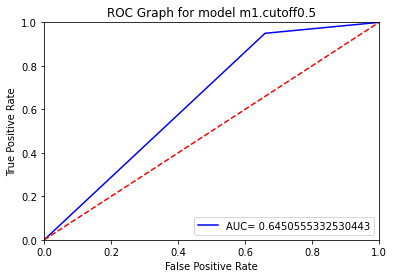

In [26]:
cutoff = 0.5
d1=cm(df1,cutoff)
rocauc(d1.act_cls,d1.pred_cls,'m1.cutoff'+str(cutoff))

cutoff=0.65,model accuracy=0.8493150684931506

pred_cls   0    1  All
act_cls               
0         27   20   47
1         35  283  318
All       62  303  365


              precision    recall  f1-score   support

           0       0.44      0.57      0.50        47
           1       0.93      0.89      0.91       318

    accuracy                           0.85       365
   macro avg       0.68      0.73      0.70       365
weighted avg       0.87      0.85      0.86       365



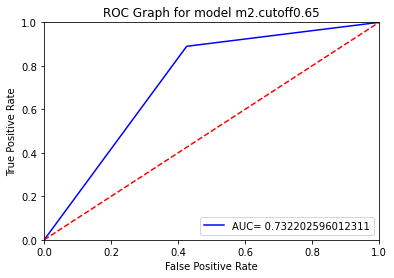

In [27]:
cutoff = 0.65
d2=cm(df1,cutoff)
rocauc(d2.act_cls,d2.pred_cls,'m2.cutoff'+str(cutoff))

# Multiclass Classification

In [52]:
#req=data[['YearBuilt','GarageCars']]
req=data[['AgeWhenSold','GarageArea','GarageCars']]
req.head()

,AgeWhenSold,GarageArea,GarageCars
0,5,548,2
1,31,460,2
2,7,608,2
3,91,642,3
4,8,836,3


In [53]:
req.GarageCars.value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [54]:
req.isnull().sum()

AgeWhenSold    0
GarageArea     0
GarageCars     0
dtype: int64

<AxesSubplot:xlabel='GarageCars', ylabel='Count'>

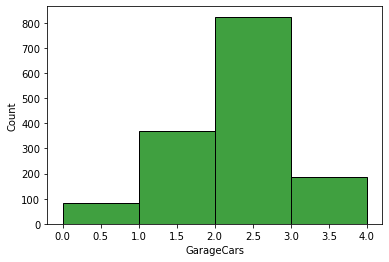

In [55]:
sns.histplot(req['GarageCars'],bins=4,color='green')

## Splitting the Data

In [56]:
y1='GarageCars'

In [57]:
trainx2,trainy2,testx2,testy2 = splitdata(req,y1)

In [58]:
print('trainx={},trainy={},testx={},testy={}'.format(trainx2.shape, trainy2.shape, testx2.shape, testy2.shape))

trainx=(1095, 2),trainy=(1095,),testx=(365, 2),testy=(365,)


In [59]:
diff_classes=set(testy2)-set(trainy2)
if len(diff_classes)>0:
    print('error:classes in test data is more than train data.Resample the dataset')
else:
    print('class distribution is ok')

class distribution is ok


In [60]:
#transform the y(train and test) variable into dummy variables

import tensorflow.keras.utils as utils 
classes = len(req[y1].unique())
trainy2 = utils.to_categorical(trainy2,classes)
testy2 = utils.to_categorical(testy2,classes)

In [61]:
trainy2[:5]

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [62]:
testy2[:5]

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

## Model Building

In [63]:
def compilemodel(units,shape,outnode):
    model = tf.keras.Sequential([
        Dense(units,activation='tanh',input_shape=[shape]), #HL1
        Dense(units,activation='relu'), #HL2
        Dense(units,activation='relu'), #HL3
        Dense(outnode,activation='softmax') #output layer
    ]) 
    
    #compiling the model
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 
    
    return(model)

In [64]:
class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,lags):
        if epoch%25 == 0:
            print('.',end=' ')


def fitmodel(model,trainx,trainy,epoch,valsplit=0.2): 
    errors=model.fit(trainx,trainy,epochs=epoch,validation_split=valsplit,verbose=0,callbacks=[PrintDot()])
    errhistory = pd.DataFrame(errors.history)
    errhistory['epoch'] = errors.epoch
    return(errhistory)

In [65]:
units = 10
shape=len(trainx2.columns)       
print(units,shape,classes)

10 2 5


In [66]:
m2=compilemodel(units,shape,classes)

In [67]:
EPOCHS = 500
e2 = fitmodel(m2,trainx2,trainy2,EPOCHS)

. . . . . . . . . . . . . . . . . . . . 

In [68]:
print(e2)

         loss  accuracy  val_loss  val_accuracy  epoch
0    1.483677  0.359589  1.433863      0.493151      0
1    1.358716  0.683790  1.312591      0.762557      1
2    1.239641  0.772831  1.191736      0.762557      2
3    1.106908  0.771689  1.056919      0.762557      3
4    0.969771  0.771689  0.921006      0.762557      4
..        ...       ...       ...           ...    ...
495  0.577366  0.755708  0.660686      0.721461    495
496  0.575477  0.761416  0.662384      0.721461    496
497  0.578490  0.751142  0.662847      0.726027    497
498  0.577586  0.761416  0.660567      0.721461    498
499  0.577584  0.755708  0.660127      0.721461    499

[500 rows x 5 columns]


In [69]:
p2 = m2.predict(testx2)

In [70]:
print(p2[0])

[3.2734778e-07 6.6116876e-03 7.6429313e-01 2.2496352e-01 4.1313530e-03]


In [71]:
pd.DataFrame(p2).head()

,0,1,2,3,4
0,3.273478e-07,0.006612,0.764293,0.224964,0.004131
1,3.274495e-07,0.006616,0.764343,0.224909,0.004132
2,3.275317e-07,0.006619,0.764384,0.224865,0.004132
3,1.837143e-06,0.685237,0.306657,0.004668,0.003435
4,3.273478e-07,0.006612,0.764293,0.224964,0.004131


In [72]:
pd.DataFrame(p2).head().idxmax(1)

0    2
1    2
2    2
3    1
4    2
dtype: int64

In [73]:
predy=pd.DataFrame({'actual':pd.DataFrame(testy2).idxmax(1),'predicted':pd.DataFrame(p2).idxmax(1)})
predy

,actual,predicted
0,2,2
1,2,2
2,2,2
3,1,1
4,3,2
...,...,...
360,2,2
361,2,2
362,1,1
363,0,0


In [74]:
def cm(df):
    
    print('model accuracy={}\n'.format(accuracy_score(df.actual,df.predicted)))
    
    #confusion matrix
    print(pd.crosstab(df.actual,df.predicted,margins=True))
    print('\n')
    
    #classification report
    print(classification_report(df.actual,df.predicted))

In [75]:
cm(predy)

model accuracy=0.7506849315068493

predicted   0    1    2  All
actual                      
0          15    0    0   15
1           0   84    7   91
2           0   32  175  207
3           0    6   45   51
4           0    0    1    1
All        15  122  228  365


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.69      0.92      0.79        91
           2       0.77      0.85      0.80       207
           3       0.00      0.00      0.00        51
           4       0.00      0.00      0.00         1

    accuracy                           0.75       365
   macro avg       0.49      0.55      0.52       365
weighted avg       0.65      0.75      0.69       365

